## Loading the imports

In [8]:
import pandas as pd                
import matplotlib.pyplot as plt    
import matplotlib.dates as mdates  
from datetime import datetime      
import mplfinance as mpf

## Loading the Data

In [9]:
df = pd.read_csv(r'C:\Users\Administrator\Documents\Assement\Task2\data.csv')

In [10]:
print(df.head())

       Date   Close    Open   High     Low
0  01/03/25  485.25  481.99  496.0  474.01
1  01/02/25  477.50  452.00  484.0  451.51
2  01/01/25  450.99  448.90  455.0  444.50
3  12/31/24  445.00  460.11  461.0  443.00
4  12/30/24  455.00  430.00  459.0  426.00


In [11]:
print(df.tail())

         Date   Close    Open    High     Low
982  01/12/21  317.59  320.00  320.00  316.65
983  01/11/21  318.25  321.00  321.56  317.50
984  01/08/21  318.90  317.00  321.49  317.00
985  01/07/21  315.75  313.49  316.50  311.15
986  01/06/21  312.00  309.95  312.74  308.50


In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df = df.sort_values('Date')

In [13]:
print(df.head())

          Date   Close    Open    High     Low
986 2021-01-06  312.00  309.95  312.74  308.50
985 2021-01-07  315.75  313.49  316.50  311.15
984 2021-01-08  318.90  317.00  321.49  317.00
983 2021-01-11  318.25  321.00  321.56  317.50
982 2021-01-12  317.59  320.00  320.00  316.65


## Creating candlestick chart using mplfinance

In [14]:
df.set_index('Date', inplace=True)

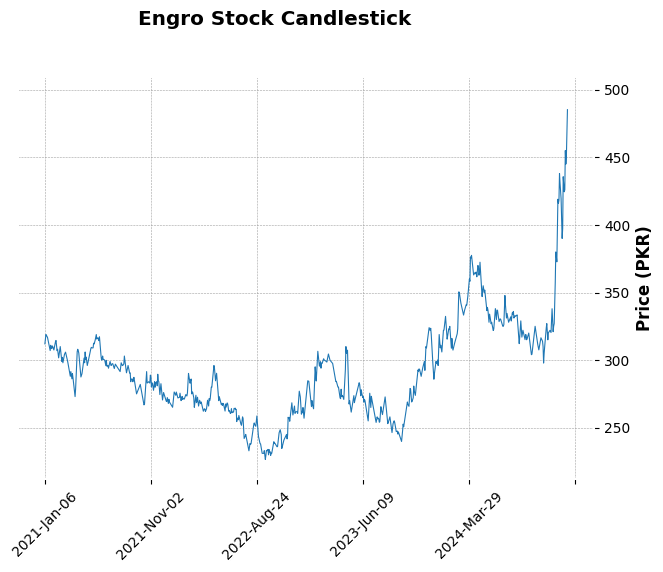

In [17]:
# Simple candlestick plot
mpf.plot(df, type='line', style='charles', title='Engro Stock Candlestick', ylabel='Price (PKR)')


## Creating the model to predict stock using LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [38]:
df = df.reset_index()
df['Date_ordinal'] = df['Date'].map(datetime.toordinal)
X = df['Date_ordinal'].values.reshape(-1,1)
y = df['Close'].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
y_pred = model.predict(X_test)

In [45]:
future_dates = [
    datetime(2025, 9, 1),
    datetime(2025, 12, 1),
    datetime(2026, 6, 1)
]
future_X = np.array([date.toordinal() for date in future_dates]).reshape(-1,1)
future_preds = model.predict(future_X)

print("\nFuture predicted prices:")
for date, price in zip(future_dates, future_preds):
    print(f"Predicted price on {date.strftime('%Y-%m-%d')}: {price:.2f} PKR")


Future predicted prices:
Predicted price on 2025-09-01: 325.57 PKR
Predicted price on 2025-12-01: 328.76 PKR
Predicted price on 2026-06-01: 335.16 PKR


In [34]:
investment_date = datetime(2025, 6, 1).toordinal()
price_on_invest = model.predict([[investment_date]])[0]

shares = 10000 / price_on_invest

future_values = shares * future_preds
for date, value in zip(future_dates, future_values):
    profit = value - 10000
    print(f"On {date.strftime('%Y-%m-%d')}, portfolio value: {value:.2f} PKR, profit: {profit:.2f} PKR")


On 2025-09-01, portfolio value: 10100.29 PKR, profit: 100.29 PKR
On 2025-12-01, portfolio value: 10199.48 PKR, profit: 199.48 PKR
On 2026-06-01, portfolio value: 10397.88 PKR, profit: 397.88 PKR


In [42]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
average_price = np.mean(y_test)
percent_error = (rmse / average_price) * 100

print("\n Error analysis:")
print(f"RMSE: {rmse:.2f} PKR")
print(f"Average prediction error: {percent_error:.2f}%")


 Error analysis:
RMSE: 35.82 PKR
Average prediction error: 12.22%


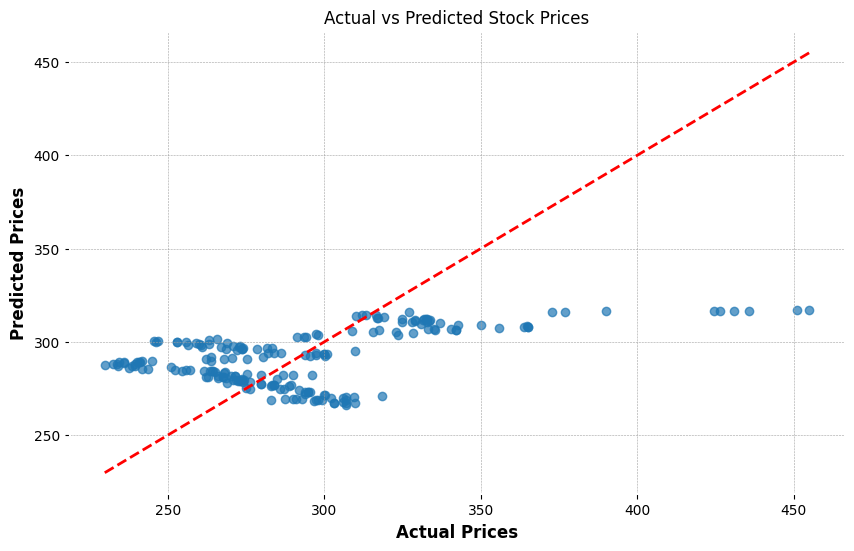

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

In [46]:
import joblib
joblib.dump(model, 'linear_model.pkl')

['linear_model.pkl']